# MSDS 458: Research/Programming Assignment #4 (Final Assignment): Part 3

**Management Problem**

For this final research assignment, I apply deep learning methods that we covered in the course (MSDS 458) to conduct sentiment analysis of Twitter data, a challenging yet important field of study for organizations in both public and private sectors. Twitter is a popular platform where entities at all levels—governments, businesses, country leaders, celebrities, and even the average social media user—express their opinions. The content of such tweets could represent a country's official policy or collectively, a country's public sentiment toward a particular issue. Given the massive volume of tweets generated each day—on average, [6,000 tweets are posted on Twitter every second](https://www.internetlivestats.com/twitter-statistics/) —there is immense value in being able quickly and accurately determine such sentiment values (e.g., positive or negative). I combine natural language processing (NLP) and deep learning techniques to build a robust Twitter sentiment classification model. 

**Corpus Description**

The corpus I use is Stanford University's [Sentiment140](http://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip). The dataset is a CSV file consisting of 1.6 million English-language tweets. The tweets are annotated using six attributes: 1. polarity of the tweet (0 = negative, 2 = neutral, 4 = positive); 2. ID; 3. date; 4. query; 5. username; 6. text.  For this project, I plan to use the polarity and text content to build a model that could take any given tweet and determine the most probable sentiment value.

**Methods**

***Text Preprocessing & Data Exploration***
<p>Given the massive number of documents in the corpus (one tweet = one document), it is important to ensure the data, particularly each tweet's text, is cleaned and tokenized properly for any follow-on modeling tasks. Regular expressions are useful in handling any emoticons or special characters (e.g., @ symbols and hashtags). As part of the data exploration step, I also generate visualizations using histograms and word clouds representing various aspects of the tweets (e.g., text content, null values, positive/negative/neutral breakdown, etc.) to gain a broad understanding of both qualitative and quantitative aspects of the corpus.</p>

***Text Vectorization***
<p>While the focus of this project is evaluating optimal deep neural network (DNN) architectures and parameters for Twitter sentiment analysis, such work is dependent on proper experimentation and implementation of various text vectorization methods. I leverage the techniques I learned in MSDS 453 for this task, which include applying word embedding approaches such as TF-IDF and Doc2vec. Since there are 1.6 million documents, it is important for me to limit the vocabulary by tuning the vectorizer hyperparameters (e.g., max_features, max_df) and exploring dimensionality reduction techniques, such as PCA.</p>
<p>I evaluate the vectors using various classifiers to ensure I have the optimal number of features in training for the classification models. I experiment with both traditional classifiers (e.g., logistic regression, random forest, and ensemble methods) and neural networks.</p>

***Building Neural Network-Based Models***
<p>The main part of this research assignment entails careful experimentation of various DNNs we covered in MSDS 458, including fully-connected dense networks, recurrent neural networks (RNN), long short-term memory networks (LSTM), and convolutional neural networks (CNN). The neural networks are built using Keras. The evaluation method to determine the best classification model consists of a strict training-and-test regimen using a crossed experimental design (e.g., maintain consistent hyperparameter settings for consistency). Vocabulary size and word embeddings also remain consistent. I experiment with various network structure designs, hyperparameter settings, and model fit methods by taking the input data (i.e., processed tweet text vectors) through single to multiple layers consisting of varying nodes/units across dense networks, RNNs, LSTM networks, and CNNs.</p>

**Evaluation**
<p>I track and compare training/testing times as well as accuracy and loss curves for train, validation, and test datasets to evaluate the deep learning models' performances. I also provide charts and plots summarizing these key metrics to visually capture which neural network structures and models yield the strongest performance, in terms of implementation time and accuracy.</p>

## NOTES

This notebook is a continuation (part 3 of 6) of MSDS 458 Final Assignment. You need access to the clean_tweets.csv file in order to run the following code.

In parts 3-6, I use observations and findings from parts 1 and 2 to train various neural network models:

* **EXPERIMENT 1: Fully connected dense neural network (DNN)**
* EXPERIMENT 2: Simple RNN
* EXPERIMENT 3: LSTM RNN
* EXPERIMENT 4: 1D CNN

The objective is to see if I can train a neural network model that could perform better than traditional machine learning models, namely logistic regrssion using a trigram TF-IDF vectorization.

This notebook covers **Experiment 1: Fully connected dense neural network (DNN)**

## Import packages needed (and set seed)

Since Keras in part of TensorFlow 2.x, we import keras from tensorflow and use tenserflow.keras.xxx to import all other Keras packages. The seed argument produces a deterministic sequence of tensors across multiple calls.

In [0]:
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import models
# from tensorflow.keras.models import Sequential, load_model
# from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Embedding
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout
# from tensorflow.keras.callbacks import ModelCheckpoint
# from tensorflow.keras.preprocessing import sequence
# keras.__version__

In [0]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import re
import os

from google.colab import files
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import utils
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction import text
from time import time

from pprint import pprint
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [0]:
seed = 50
np.random.seed(seed)
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, SimpleRNN
from keras.layers import Flatten
from keras.callbacks import ModelCheckpoint
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout
from keras.layers import Activation, Dropout, Flatten, Dense

Using TensorFlow backend.


In [0]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
os.chdir('/content/drive/My Drive/MSDS Files/MSDS 458/Assignment 4')

# Check working directory
!pwd

# Check files in directory
!ls

/content/drive/My Drive/MSDS Files/MSDS 458/Assignment 4
clean_tweets.csv
clf_compare_accuracy_summary.csv
cvec_tfidf_accuracy_summary.csv
d2v_model_dbow.doc2vec
d2v_model_dbow.doc2vec.docvecs.vectors_docs.npy
d2v_model_dbow.doc2vec.trainables.syn1neg.npy
d2v_model_dbow.doc2vec.wv.vectors.npy
Data
dbow_cvec_tfidf_accuracy_summary.csv
dmm_dbow_cvec_tfidf_accuracy_summary.csv
glove.twitter.27B
model_dnn1.h5
model_dnn2.h5
model.png
model_rnn1.h5
model_rnn2.h5
model_rnn3.h5
ngram_accuracy_comparison_plot.png
results1.pkl
results2.pkl


In [0]:
df = pd.read_csv('clean_tweets.csv', index_col=0)

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [0]:
df.head()

,text,target
0,awww that bummer you shoulda got david carr of...,0
1,is upset that he can not update his facebook b...,0
2,dived many times for the ball managed to save ...,0
3,my whole body feels itchy and like its on fire,0
4,no it not behaving at all mad why am here beca...,0


## Model Training Prep

Train / Dev / Test Split

Given the 1.5 million+ size of the dataset, I will split the data into training, validation, and test data.

In [0]:
x = df.text
y = df.target

In [0]:
SEED = 5000
x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(x, y, test_size=.02, random_state=SEED)
x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, test_size=.5, random_state=SEED)

In [0]:
print("Train set has total {0} entries with {1:.2f}% negative tweets, {2:.2f}% positive tweets.".format(len(x_train),
                                                                             (len(x_train[y_train == 0]) / (len(x_train)*1.))*100,
                                                                            (len(x_train[y_train == 1]) / (len(x_train)*1.))*100))
print("Validation set has total {0} entries with {1:.2f}% negative tweets, {2:.2f}% positive tweets.".format(len(x_validation),
                                                                             (len(x_validation[y_validation == 0]) / (len(x_validation)*1.))*100,
                                                                            (len(x_validation[y_validation == 1]) / (len(x_validation)*1.))*100))
print("Test set has total {0} entries with {1:.2f}% negative tweets, {2:.2f}% positive tweets.".format(len(x_test),
                                                                             (len(x_test[y_test == 0]) / (len(x_test)*1.))*100,
                                                                            (len(x_test[y_test == 1]) / (len(x_test)*1.))*100))

Train set has total 1564120 entries with 50.02% negative tweets, 49.98% positive tweets.
Validation set has total 15960 entries with 49.18% negative tweets, 50.82% positive tweets.
Test set has total 15961 entries with 49.86% negative tweets, 50.14% positive tweets.


## Train/Test Timer Functions

In [0]:
# Define callback to get total training time
import datetime

class TrainRuntimeCallback(keras.callbacks.Callback):

  def on_train_begin(self,logs={}):
    self.start = datetime.datetime.now()

  def on_train_end(self,logs={}):
    self.process_time = (datetime.datetime.now() - self.start).total_seconds()


# Define callback to get total test time

class TestRuntimeCallback(keras.callbacks.Callback):

  def on_test_begin(self,logs={}):
    self.start = datetime.datetime.now()

  def on_test_end(self,logs={}):
    self.process_time = (datetime.datetime.now() - self.start).total_seconds()

train_rt = TrainRuntimeCallback()
test_rt = TestRuntimeCallback()

## Hyperparameter Settings

In [0]:
num_epochs = 10
batch_size = 64
# validation_split = 0.20
patience = 3
# cbs = [train_rt, keras.callbacks.EarlyStopping(patience=5, restore_best_weights = True)]

optimizer='rmsprop'
loss='binary_crossentropy'
metrics=['accuracy']

dropout = 0.2

## TF-IDF + Logistic Regression (Trigram)

In part 2, I discovered that a logistic regression model with a trigram TF-IDF vectorization resulted in the highest accuracy (higher than the Doc2vec+DBOW model or Doc2vec+DMM models). I will generate the accuracy scores for both the train and validation data as reference points for the subsequent neural network model.

In [0]:
tfidf_vector = TfidfVectorizer(max_features=80000,ngram_range=(1, 3))
tfidf_vector.fit(x_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=80000,
                min_df=1, ngram_range=(1, 3), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [0]:
#vectorizing train data
x_train_tfidf = tfidf_vector.transform(x_train)

In [0]:
#vectorizing validation data
x_validation_tfidf = tfidf_vector.transform(x_validation).toarray()

In [0]:
# vectorizing test data
x_test_tfidf = tfidf_vector.transform(x_test).toarray()

In [0]:
%%time
lr_clf = LogisticRegression()
lr_clf.fit(x_train_tfidf, y_train)

CPU times: user 58.6 s, sys: 1min 12s, total: 2min 11s
Wall time: 43.6 s


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [0]:
lr_clf.score(x_validation_tfidf, y_validation)

0.831265664160401

In [0]:
lr_clf.score(x_train_tfidf, y_train)

0.8356705367874587

**TF-IDF + Logistic Regression Accuracy Results:**
*  Training Accuracy: 83.57%
*  Validation Accuracy: 83.13%

## Training Models

Upgrade to TensorFlow 2.x:

https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/guide/migrate.ipynb

In [0]:
# from __future__ import absolute_import, division, print_function, unicode_literals
# try:
#   # %tensorflow_version only exists in Colab.
#   %tensorflow_version 2.x
# except Exception:
#   pass
# import tensorflow as tf


# import tensorflow_datasets as tfds

Keras NN model cannot handle sparse matrix directly. The data has to be dense array or matrix, but transforming the whole training data Tfidf vectors of 1.5 million+ to dense array is too big for my system to handle. As a workaround, we can use the following function, which generates iterable generator object so that it can be fed to NN model. Note: the output should be a generator class object rather than arrays, this can be achieved by using "yield" instead of "return".

In [0]:
def batch_generator(X_data, y_data, batch_size):
    samples_per_epoch = X_data.shape[0]
    number_of_batches = samples_per_epoch/batch_size
    counter=0
    index = np.arange(np.shape(y_data)[0])
    while 1:
        index_batch = index[batch_size*counter:batch_size*(counter+1)]
        X_batch = X_data[index_batch,:].toarray()
        y_batch = y_data[y_data.index[index_batch]]
        counter += 1
        yield X_batch,y_batch
        if (counter > number_of_batches):
            counter=0

### DNN (3 Layers)

#### Build Network

In [0]:
model_dnn1 = Sequential()
model_dnn1.add(Dense(64, activation='relu', input_dim=80000))
model_dnn1.add(Dense(32, activation='relu'))
model_dnn1.add(Dense(1, activation='sigmoid'))

# model_dnn1 = Sequential()
# model_dnn1.add(Dense(64, kernel_initializer ='uniform', activation='relu', input_dim=80000))
# model_dnn1.add(Dense(32, activation='relu'))
# model_dnn1.add(Dense(1, kernel_initializer ='uniform', activation='sigmoid'))

# model = Sequential()
# model.add(Dense(units =  64, activation='relu', input_shape=(voc_size,))) # vocabulary size = 10,000
# model.add(Dense(units =  32, activation='relu'))
# model.add(Dense(units =  9, activation='softmax'))

# compile model using accuracy to measure model performance
model_dnn1.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics)

# define the checkpoint
filepath = "model_dnn1.h5"
dnn1_checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period = 1)
# callbacks_list = [dnn1_checkpoint]
# cbs = [dnn1_checkpoint, train_rt, keras.callbacks.EarlyStopping(patience=patience, restore_best_weights = True)]

# # train the model
# history_nn1 = model_nn1.fit_generator(generator=batch_generator(x_train_tfidf, y_train, 32),
#                     epochs=2, validation_data=(x_validation_tfidf, y_validation),
#                     steps_per_epoch=x_train_tfidf.shape[0]/32, callbacks=callbacks_list)

# # save model
# model.save('model_nn1.h5') 

# # evaluate model on train & validation sets
# scores = model_nn1.evaluate(x_train_tfidf, y_train)
# print("\n%s: %.2f%%" % (model_nn1.metrics_names[1], scores[1]*100), "for training set\n")
# train_acc_model_nn1 = scores[1]

# scores_val = model_nn1.evaluate(x_validation_tfidf, y_validation)
# print("\n%s: %.2f%%" % (model_nn1.metrics_names[1], scores_val[1]*100), "for validation set")
# test_acc_model_nn1 = scores_val[1]

model_dnn1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                5120064   
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 5,122,177
Trainable params: 5,122,177
Non-trainable params: 0
_________________________________________________________________


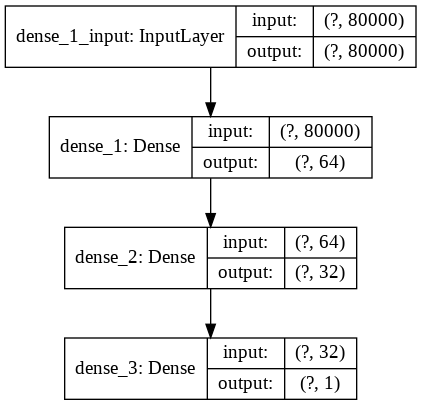

In [0]:
keras.utils.plot_model(model_dnn1, show_shapes=True)

#### Train Model

In [0]:
# train the model

train_rt = TrainRuntimeCallback()
cbs = [dnn1_checkpoint, train_rt, keras.callbacks.EarlyStopping(patience=patience, restore_best_weights = True)]

history_dnn1 = model_dnn1.fit_generator(generator=batch_generator(x_train_tfidf, y_train, 64),
                    epochs=num_epochs, validation_data=(x_validation_tfidf, y_validation),
                    steps_per_epoch=x_train_tfidf.shape[0]/64, callbacks=cbs)

# history_dnn1 = model_dnn1.fit_generator(generator=batch_generator(x_train_tfidf, y_train, 32),
#                     epochs=num_epochs, validation_data=(x_validation_tfidf, y_validation),
#                     steps_per_epoch=x_train_tfidf.shape[0]/32, callbacks=cbs)

Epoch 1/10
24440/24439 [==============================] - 508s 21ms/step - loss: 0.4268 - accuracy: 0.8068 - val_loss: 0.4133 - val_accuracy: 0.8177
Epoch 2/10
24440/24439 [==============================] - 503s 21ms/step - loss: 0.4061 - accuracy: 0.8205 - val_loss: 0.4120 - val_accuracy: 0.8199
Epoch 3/10
24440/24439 [==============================] - 501s 21ms/step - loss: 0.3960 - accuracy: 0.8271 - val_loss: 0.4128 - val_accuracy: 0.8196
Epoch 4/10
24440/24439 [==============================] - 500s 20ms/step - loss: 0.3894 - accuracy: 0.8310 - val_loss: 0.4188 - val_accuracy: 0.8161
Epoch 5/10
24440/24439 [==============================] - 500s 20ms/step - loss: 0.3842 - accuracy: 0.8340 - val_loss: 0.4263 - val_accuracy: 0.8128


In [0]:
# Get the training time
train_time = train_rt.process_time
train_time # in seconds

2517.518805

In [0]:
print(f"train_acc: {history_dnn1.history['accuracy'][-1]}, val_acc: {history_dnn1.history['val_accuracy'][-1]}")

train_acc: 0.833952009677887, val_acc: 0.8128446340560913


#### Save Model

In [0]:
# save model
model_dnn1.save('model_dnn1.h5') 

In [0]:

# # evaluate model on train, validation, and test sets
# scores = model_dnn1.evaluate(x_train_tfidf, y_train)
# print("\n%s: %.2f%%" % (model_dnn1.metrics_names[1], scores[1]*100), "for training set\n")
# train_acc_model_dnn1 = scores[1]

# scores_val = model_dnn1.evaluate(x_validation_tfidf, y_validation)
# print("\n%s: %.2f%%" % (model_dnn1.metrics_names[1], scores_val[1]*100), "for validation set")
# val_acc_model_dnn1 = scores_val[1]

# scores_test = model_dnn1.evaluate(x_train_tfidf, y_test)
# print("\n%s: %.2f%%" % (model_dnn1.metrics_names[1], scores_test[1]*100), "for test set")
# test_acc_model_dnn1 = scores_test[1]

#### Test Model

In [0]:
test_rt = TestRuntimeCallback()
# test_loss, test_acc = model.evaluate(test_data_sm_cnn, one_hot_test_labels_sm, callbacks=[test_rt])

# test_loss, test_accuracy = model.evaluate(test_data_sm_cnn, one_hot_test_labels_sm, callbacks=[test_rt])

test_loss, test_acc = model_dnn1.evaluate(x_test_tfidf, y_test, callbacks = [test_rt])

print(f"test_accuracy={test_acc}, test_loss={test_loss}")

15961/15961 [==============================] - 6s 375us/step
test_accuracy=0.8108514547348022, test_loss=0.4230083193678761


In [0]:
# Get the test time
test_time = test_rt.process_time
test_time # in seconds

5.990464

In [0]:
history_dict = history_dnn1.history
history_dict['train_accuracy'] = history_dict.pop('accuracy') # rename the the key to 'train_accuracy'
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'train_accuracy'])

In [0]:
import pandas as pd
history_df=pd.DataFrame(history_dict)
history_df['test_accuracy'] = test_acc   # using the test accuracy for smaller dataset model, NOT the full model
history_df = history_df.iloc[-1:]
history_df.tail()

,val_loss,val_accuracy,loss,train_accuracy,test_accuracy
4,0.426255,0.812845,0.384176,0.833952,0.810851


#### Save Performance to Dataframe

In [0]:
results_df = history_df.iloc[-1:].copy()
results_df.insert(0,'model','DNN (3 layers)') # want the model name to appear first
results_df['test_accuracy'] = test_acc   # test accuracy
results_df['training time (sec)'] = train_time      # we are okay with training time appearing last
results_df['testing time (sec)'] = test_time      # we are okay with test time appearing last
results_df

,model,val_loss,val_accuracy,loss,train_accuracy,test_accuracy,training time (sec),testing time (sec)
4,DNN (3 layers),0.426255,0.812845,0.384176,0.833952,0.810851,2517.518805,5.990464


In [0]:
# # load model
# model_nn1_load = load_model("model_nn1.h5")

# # evaluate model on train & validation sets
# scores = model_nn1_load.evaluate(x_train_tfidf, y_train)
# print("\n%s: %.2f%%" % (model_nn1_load.metrics_names[1], scores[1]*100), "for training set\n")
# train_acc_model_nn1 = scores[1]

# scores_val = model_nn1_load.evaluate(x_validation_tfidf, y_validation)
# print("\n%s: %.2f%%" % (model_nn1_load.metrics_names[1], scores_val[1]*100), "for validation set")
# val_acc_model_nn1 = scores_val[1]

1564120/1564120 [==============================] - 756s 483us/step

acc: 84.42% for training set

15960/15960 [==============================] - 9s 551us/step

acc: 82.98% for validation set


#### Plot Performance

dict_keys(['val_loss', 'val_accuracy', 'loss', 'train_accuracy'])


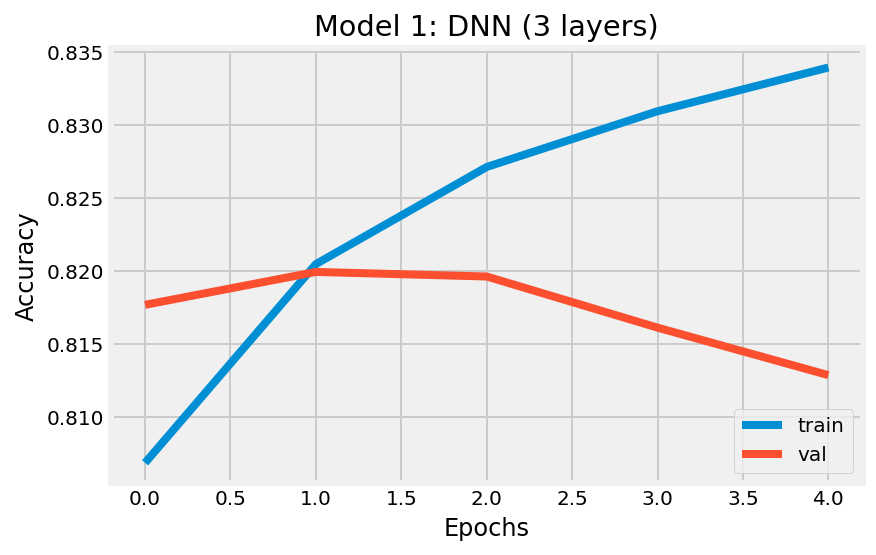

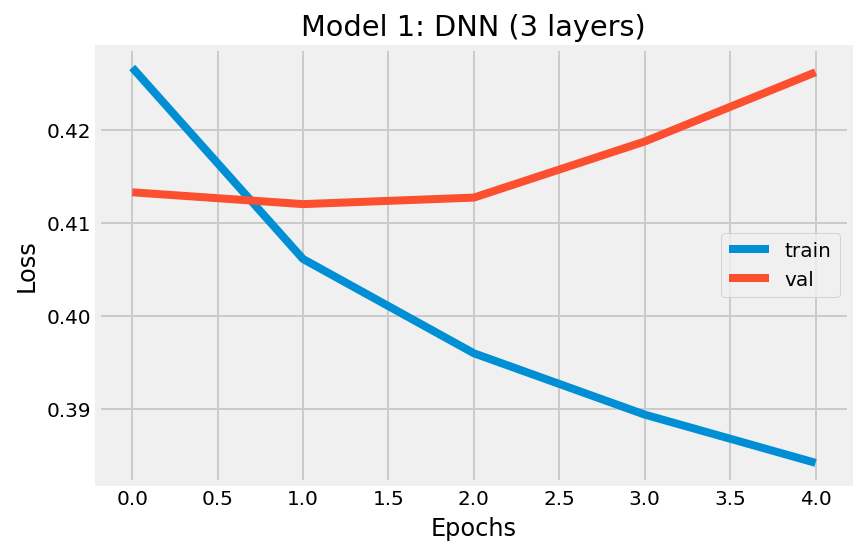

In [0]:
import matplotlib.pyplot as plt

# list all data in history
print(history_dnn1.history.keys())

# summarize history for accuracy
plt.plot(history_dnn1.history['train_accuracy'])
plt.plot(history_dnn1.history['val_accuracy'])
plt.title('Model 1: DNN (3 layers)')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

# summarize history for loss
plt.plot(history_dnn1.history['loss'])
plt.plot(history_dnn1.history['val_loss'])
plt.title('Model 1: DNN (3 layers)')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'], loc='center right')
plt.show()

# from google.colab import files
# plt.savefig("model_v5_history.png")

In [0]:
# # Plot the accuracy curves for training and validation 
# plt.plot(history_nn1.history['acc'], color='b', label="train", linewidth = 1)
# plt.plot(history_nn1.history['val_acc'], color='r',label="validation", linewidth = 1)
# legend = plt.legend(loc='center right', shadow=True)
# plt.title('Accuracy Curves for NN Model 1', fontsize = 15)
# plt.savefig('model_nn1_acc_curves.png')

### DNN w/ Dropout (3 Layers)

#### Build Network

This model includes a 20% dropout after the activiation layer. The purpose of the dropout layer is to reduce overfitting.

In [0]:
model_dnn2 = Sequential()
model_dnn2.add(Dense(64, activation='relu', input_dim=80000))
model_dnn2.add(Dropout(dropout))
model_dnn2.add(Dense(32, activation='relu'))
model_dnn2.add(Dropout(dropout))
model_dnn2.add(Dense(1, activation='sigmoid'))

# compile model using accuracy to measure model performance
model_dnn2.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics)

# define the checkpoint
filepath = "model_dnn2.h5"
dnn2_checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period = 1)

model_dnn2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 64)                5120064   
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 5,122,177
Trainable params: 5,122,177
Non-trainable params: 0
_________________________________________________________________


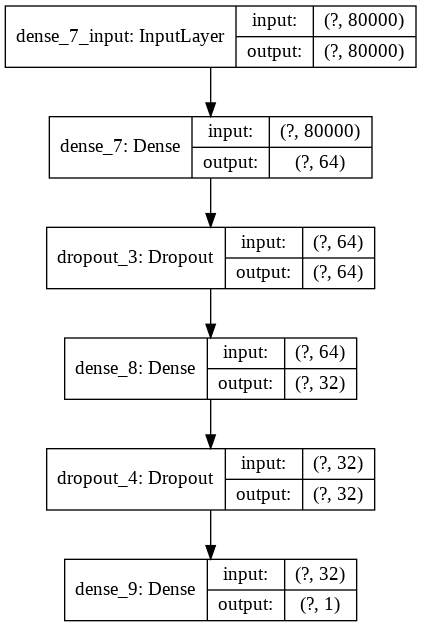

In [0]:
keras.utils.plot_model(model_dnn2, show_shapes=True)

#### Train Model

In [0]:
# train the model

train_rt = TrainRuntimeCallback()
cbs = [dnn2_checkpoint, train_rt, keras.callbacks.EarlyStopping(patience=patience, restore_best_weights = True)]

history_dnn2 = model_dnn2.fit_generator(generator=batch_generator(x_train_tfidf, y_train, 64),
                    epochs=num_epochs, validation_data=(x_validation_tfidf, y_validation),
                    steps_per_epoch=x_train_tfidf.shape[0]/64, callbacks=cbs)

Epoch 1/10
24440/24439 [==============================] - 514s 21ms/step - loss: 0.4357 - accuracy: 0.8036 - val_loss: 0.4186 - val_accuracy: 0.8155
Epoch 2/10
24440/24439 [==============================] - 510s 21ms/step - loss: 0.4238 - accuracy: 0.8126 - val_loss: 0.4180 - val_accuracy: 0.8160
Epoch 3/10
24440/24439 [==============================] - 507s 21ms/step - loss: 0.4212 - accuracy: 0.8148 - val_loss: 0.4190 - val_accuracy: 0.8201
Epoch 4/10
24440/24439 [==============================] - 506s 21ms/step - loss: 0.4189 - accuracy: 0.8166 - val_loss: 0.4185 - val_accuracy: 0.8176
Epoch 5/10
24440/24439 [==============================] - 509s 21ms/step - loss: 0.4180 - accuracy: 0.8172 - val_loss: 0.4191 - val_accuracy: 0.8183


#### Save Model

In [0]:
# save model
model_dnn2.save('model_dnn2.h5') 

#### Test Model

In [0]:
test_rt = TestRuntimeCallback()

test_loss, test_acc = model_dnn2.evaluate(x_test_tfidf, y_test, callbacks = [test_rt])

print(f"test_accuracy={test_acc}, test_loss={test_loss}")

15961/15961 [==============================] - 6s 378us/step
test_accuracy=0.8102249503135681, test_loss=0.42650014605336034


In [0]:
# Get the test time
test_time = test_rt.process_time
test_time # in seconds

6.026241

In [0]:
history_dict = history_dnn2.history
history_dict['train_accuracy'] = history_dict.pop('accuracy') # rename the the key to 'train_accuracy'
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'train_accuracy'])

In [0]:
import pandas as pd
history_df=pd.DataFrame(history_dict)
history_df['test_accuracy'] = test_acc   # using the test accuracy for smaller dataset model, NOT the full model
history_df = history_df.iloc[-1:]
history_df.tail()

,val_loss,val_accuracy,loss,train_accuracy,test_accuracy
4,0.419115,0.818296,0.417987,0.817185,0.810225


#### Save Performance to Dataframe

In [0]:
results_df_v2 = history_df.iloc[-1:].copy()
results_df_v2.insert(0,'model','DNN w/ Dropout') # went the model name to appear first
results_df_v2['test_accuracy'] = test_acc
results_df_v2['training time (sec)'] = train_time      # we are okay with training time appearing last
results_df_v2['testing time (sec)'] = test_time      # we are okay with training time appearing last
results_df_v2

,model,val_loss,val_accuracy,loss,train_accuracy,test_accuracy,training time (sec),testing time (sec)
4,DNN w/ Dropout,0.419115,0.818296,0.417987,0.817185,0.810225,2517.518805,6.026241


In [0]:
results_df = results_df.append(results_df_v2,ignore_index=True)
results_df

,model,val_loss,val_accuracy,loss,train_accuracy,test_accuracy,training time (sec),testing time (sec)
0,DNN (3 layers),0.426255,0.812845,0.384176,0.833952,0.810851,2517.518805,5.990464
1,DNN w/ Dropout,0.419115,0.818296,0.417987,0.817185,0.810225,2517.518805,6.026241


#### Plot Performance

dict_keys(['val_loss', 'val_accuracy', 'loss', 'train_accuracy'])


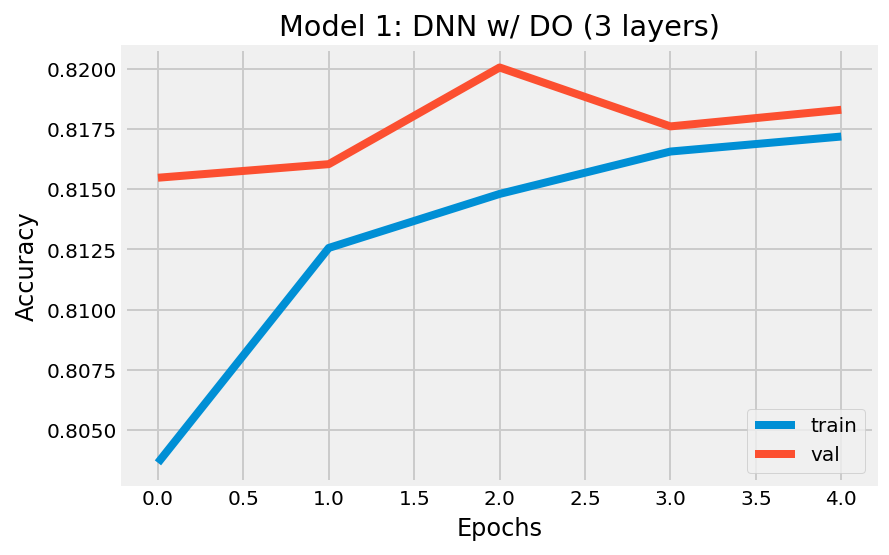

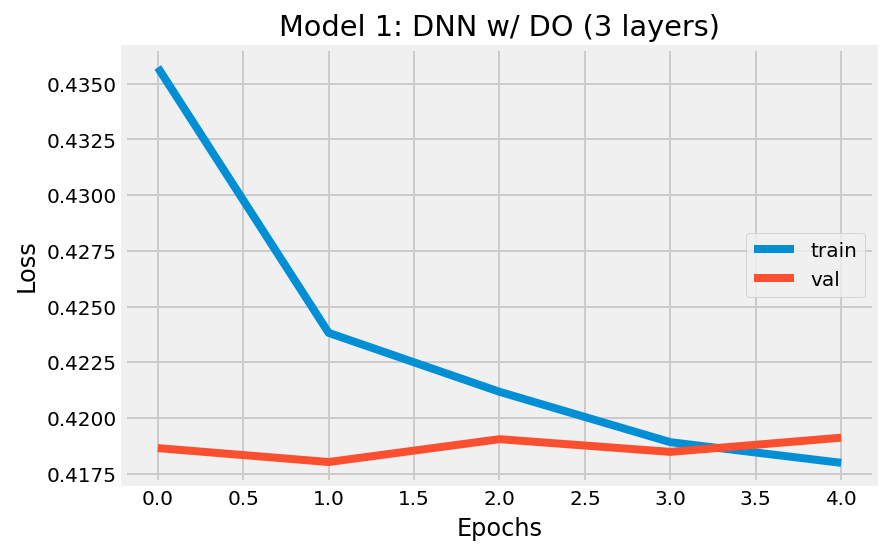

In [0]:
import matplotlib.pyplot as plt

# list all data in history
print(history_dnn2.history.keys())

# summarize history for accuracy
plt.plot(history_dnn2.history['train_accuracy'])
plt.plot(history_dnn2.history['val_accuracy'])
plt.title('Model 1: DNN w/ DO (3 layers)')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

# summarize history for loss
plt.plot(history_dnn2.history['loss'])
plt.plot(history_dnn2.history['val_loss'])
plt.title('Model 1: DNN w/ DO (3 layers)')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'], loc='center right')
plt.show()

NN-2 model training with 1 epoch was already completed using the script above. I will load the saved model ('model_nn2.h5') and continue training the model through the second epoch.

In [0]:
# load model
model_nn2_load = load_model("model_nn2.h5")

# define checkpoint to save model after each epoch
filepath = "model_nn2.h5"
nn2_checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='max', save_freq='epoch')

#train the model
history_nn2 = model_nn2_load.fit_generator(generator=batch_generator(x_train_tfidf, y_train, 32),
                    epochs=1, validation_data=(x_validation_tfidf, y_validation),
                    steps_per_epoch=x_train_tfidf.shape[0]/32, callbacks=[nn2_checkpoint])

In [0]:
# load model
model_nn2_load = load_model("model_nn2.h5")





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




In [0]:
# evaluate model on train set
scores = model_nn2_load.evaluate(x_train_tfidf, y_train)
print("\n%s: %.2f%%" % (model_nn2_load.metrics_names[1], scores[1]*100), "for training set\n")
train_acc_model_nn2 = scores[1]

1564120/1564120 [==============================] - 789s 504us/step

acc: 83.84% for training set



In [0]:
# evaluate model on validation set
scores_val = model_nn2_load.evaluate(x_validation_tfidf, y_validation)
print("\n%s: %.2f%%" % (model_nn2_load.metrics_names[1], scores_val[1]*100), "for validation set")
val_acc_model_nn2 = scores_val[1]

15960/15960 [==============================] - 7s 428us/step

acc: 82.87% for validation set


### DNN w/ Pretrained Word Embeddings (no dropout)



#### Text Preprocessing w/ Pre-Trained Word Embeddings

In [0]:
glove_dir = '/content/drive/My Drive/MSDS Files/MSDS 458/Assignment 4/glove.twitter.27B'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.twitter.27B.200d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 1193515 word vectors.


In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [0]:
tokenizer = Tokenizer(num_words=100000)
tokenizer.fit_on_texts(x_train)
sequences = tokenizer.texts_to_sequences(x_train)

In [0]:
for x in x_train[:5]:
    print(x)

run house but shit its taking me away from my homework ahhhh more classes more assignments
and we are having jaljeera party join in buddy fb
going out with friends tonight today is friends day
went paintballing yesterday got shot in the arm and it hurts but shot kid and he was cying in pain so its no all bad haha evil me
sorry ll make you chicken soup


In [0]:
sequences[:5]

[[436, 204, 17, 353, 62, 408, 14, 212, 51, 3, 578, 1517, 79, 1138, 79, 2826],
 [5, 43, 33, 171, 14239, 269, 781, 9, 1232, 647],
 [42, 31, 20, 185, 116, 37, 8, 185, 29],
 [203,
  15929,
  278,
  45,
  1106,
  9,
  2,
  1486,
  5,
  4,
  340,
  17,
  1106,
  858,
  5,
  78,
  23,
  51053,
  9,
  494,
  15,
  62,
  35,
  30,
  110,
  97,
  1549,
  14],
 [115, 73, 119, 6, 870, 1449]]

In [0]:
length = []
for x in x_train:
    length.append(len(x.split()))

In [0]:
# pad sequence train data
x_train_seq = pad_sequences(sequences, maxlen=45)
print('Shape of data tensor:', x_train_seq.shape)

Shape of data tensor: (1564120, 45)


In [0]:
# pad sequence val data
sequences_val = tokenizer.texts_to_sequences(x_validation)
x_val_seq = pad_sequences(sequences_val, maxlen=45)

In [0]:
# pad sequence test data
sequences_test = tokenizer.texts_to_sequences(x_test)
x_test_seq = pad_sequences(sequences_test, maxlen=45)

I am defining the number of words to be 100,000. This means I will only care about 100,000 most frequent words in the training set. If I don't limit the number of words, the total number of vocabulary will be more than 200,000.

In [0]:
num_words = 100000
embedding_matrix = np.zeros((num_words, 200))
for word, i in tokenizer.word_index.items():
    if i >= num_words:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

As a sanity check, if the embedding matrix has been generated properly. Above, when I saw the first five entries of the training set, the first entry started with the word "run," which had the sequential representation [436]. Let's see if the 436th embedding matrix is as same as vectors for the word 'run.'

In [0]:
np.array_equal(embedding_matrix[436] ,embeddings_index.get('run'))

True

#### Build Network

In [0]:
model_dnn3 = Sequential()
e = Embedding(100000, 200, weights=[embedding_matrix], input_length=45, trainable=True)
model_dnn3.add(e)
model_dnn3.add(Flatten())
model_dnn3.add(Dense(64, activation='relu', input_dim=80000))
model_dnn3.add(Dropout(dropout))
model_dnn3.add(Dense(32, activation='relu'))
model_dnn3.add(Dropout(dropout))
model_dnn3.add(Dense(1, activation='sigmoid'))

model_dnn3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 45, 200)           20000000  
_________________________________________________________________
flatten_2 (Flatten)          (None, 9000)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                576064    
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_6 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                

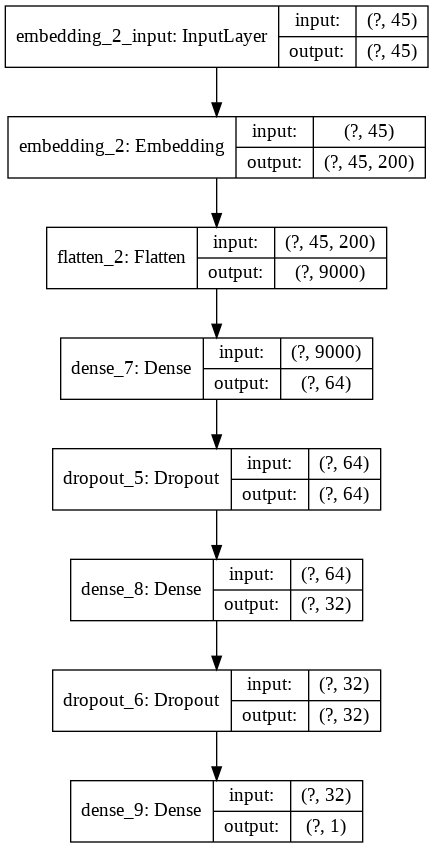

In [0]:
keras.utils.plot_model(model_dnn3, show_shapes=True)

In [0]:
model_dnn3.layers[0].set_weights([embedding_matrix])
model_dnn3.layers[0].trainable = False

In [0]:
# compile model using accuracy to measure model performance
model_dnn3.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics)

# define the checkpoint
filepath = "model_dnn3.h5"
dnn3_checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period = 1)


#### Train Model

In [0]:
# train the model
train_rt = TrainRuntimeCallback()
cbs = [dnn3_checkpoint, train_rt, keras.callbacks.EarlyStopping(patience=patience, restore_best_weights = True)]

# history_dnn3 = model_dnn3.fit_generator(generator=batch_generator(x_train_seq, y_train, 64),
#                     epochs=num_epochs, validation_data=(x_val_seq, y_validation),
#                     steps_per_epoch=x_train_tfidf.shape[0]/64, callbacks=cbs)

history_dnn3 = model_dnn3.fit(x_train_seq,             
                    y_train,  
                    callbacks = cbs,
                    epochs=num_epochs,
                    batch_size=batch_size,
                    validation_data=(x_val_seq, y_validation))

Train on 1564120 samples, validate on 15960 samples
Epoch 1/10
1564120/1564120 [==============================] - 174s 111us/step - loss: 0.4814 - accuracy: 0.7702 - val_loss: 0.4507 - val_accuracy: 0.7890
Epoch 2/10
1564120/1564120 [==============================] - 171s 109us/step - loss: 0.4575 - accuracy: 0.7878 - val_loss: 0.4474 - val_accuracy: 0.7932
Epoch 3/10
1564120/1564120 [==============================] - 168s 108us/step - loss: 0.4466 - accuracy: 0.7957 - val_loss: 0.4408 - val_accuracy: 0.7954
Epoch 4/10
1564120/1564120 [==============================] - 171s 109us/step - loss: 0.4390 - accuracy: 0.8011 - val_loss: 0.4438 - val_accuracy: 0.7971
Epoch 5/10
1564120/1564120 [==============================] - 170s 109us/step - loss: 0.4330 - accuracy: 0.8053 - val_loss: 0.4511 - val_accuracy: 0.7973
Epoch 6/10
1564120/1564120 [==============================] - 171s 110us/step - loss: 0.4281 - accuracy: 0.8089 - val_loss: 0.4424 - val_accuracy: 0.7955


In [0]:
history_dnn3.history

{'loss': [0.48136961196409883,
  0.45747852572695913,
  0.44660693312384536,
  0.43903517424763033,
  0.43302157402322095,
  0.4280793786030598],
 'train_accuracy': [0.77016854,
  0.7878085,
  0.79568064,
  0.8010939,
  0.8053372,
  0.8088606],
 'val_accuracy': [0.7889724373817444,
  0.7932330965995789,
  0.7953634262084961,
  0.7971177697181702,
  0.7973057627677917,
  0.795488715171814],
 'val_loss': [0.4506570948992755,
  0.44741922775306797,
  0.44078637370489593,
  0.44382938642549635,
  0.4511067857120868,
  0.4424342097793904]}

In [0]:
# Get the training time
train_time = train_rt.process_time
train_time # in seconds

print(f"train_acc: {history_dnn3.history['train_accuracy'][-1]}, val_acc: {history_dnn3.history['val_accuracy'][-1]}")

train_acc: 0.8088605999946594, val_acc: 0.795488715171814


#### Save Model

In [0]:
# save model
model_dnn3.save('model_dnn3.h5') 

#### Test Model

In [0]:
test_rt = TestRuntimeCallback()

test_loss, test_acc = model_dnn3.evaluate(x_test_seq, y_test, callbacks = [test_rt])

print(f"test_accuracy={test_acc}, test_loss={test_loss}")

15961/15961 [==============================] - 1s 53us/step
test_accuracy=0.7876699566841125, test_loss=0.4579356060568219


In [0]:
# Get the test time
test_time = test_rt.process_time
test_time # in seconds

0.851879

In [0]:
history_dict = history_dnn3.history
history_dict['train_accuracy'] = history_dict.pop('accuracy') # rename the the key to 'train_accuracy'
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'train_accuracy'])

In [0]:
import pandas as pd
history_df=pd.DataFrame(history_dict)
history_df['test_accuracy'] = test_acc   # using the test accuracy for smaller dataset model, NOT the full model
history_df = history_df.iloc[-1:]
history_df.tail()

,val_loss,val_accuracy,loss,train_accuracy,test_accuracy
5,0.442434,0.795489,0.428079,0.808861,0.78767


In [0]:
results_df_v3 = history_df.iloc[-1:].copy()
results_df_v3.insert(0,'model','DNN w/ Word Embeddings') # went the model name to appear first
results_df_v3['test_accuracy'] = test_acc
results_df_v3['training time (sec)'] = train_time      # we are okay with training time appearing last
results_df_v3['testing time (sec)'] = test_time      # we are okay with training time appearing last
results_df_v3

,model,val_loss,val_accuracy,loss,train_accuracy,test_accuracy,training time (sec),testing time (sec)
5,DNN w/ Word Embeddings,0.442434,0.795489,0.428079,0.808861,0.78767,1030.219377,0.851879


#### Save Performance to Dataframe

In [0]:
prev_results_df = pd.read_pickle('results2_v2.pkl')
results_df = prev_results_df.append(results_df_v3,ignore_index=True)
results_df

,model,val_loss,val_accuracy,loss,train_accuracy,test_accuracy,training time (sec),testing time (sec)
0,DNN (3 layers),0.426255,0.812845,0.384176,0.833952,0.810851,2517.518805,5.990464
1,DNN w/ Dropout,0.419115,0.818296,0.417987,0.817185,0.810225,2517.518805,6.026241
2,Simple RNN,0.469121,0.782143,0.439075,0.800082,0.801892,1834.569555,1.979959
3,RNN w/ Dropout,0.511496,0.751253,0.553732,0.717752,0.774513,1834.569555,2.334067
4,RNN w/ Trainable Word Embeddings,0.416349,0.815915,0.412151,0.818388,0.811415,1834.569555,2.233131
5,DNN w/ Word Embeddings,0.442434,0.795489,0.428079,0.808861,0.787670,1030.219377,0.851879


#### Plot Performance

dict_keys(['val_loss', 'val_accuracy', 'loss', 'train_accuracy'])


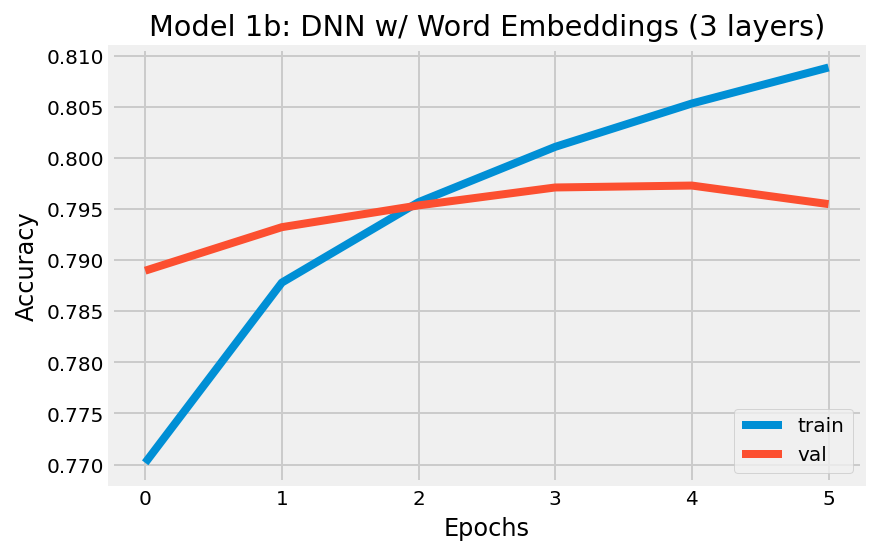

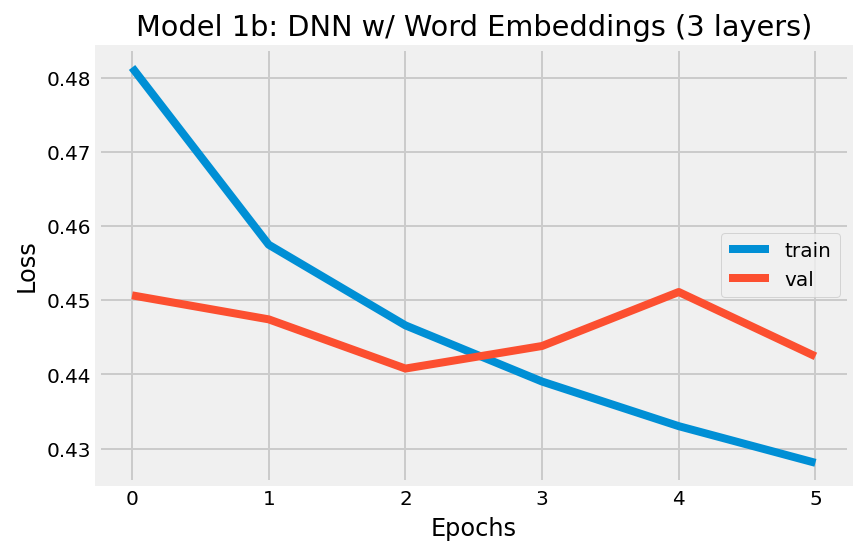

In [0]:
import matplotlib.pyplot as plt

# list all data in history
print(history_dnn3.history.keys())

# summarize history for accuracy
plt.plot(history_dnn3.history['train_accuracy'])
plt.plot(history_dnn3.history['val_accuracy'])
plt.title('Model 1b: DNN w/ Word Embeddings (3 layers)')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

# summarize history for loss
plt.plot(history_dnn3.history['loss'])
plt.plot(history_dnn3.history['val_loss'])
plt.title('Model 1b: DNN w/ Word Embeddings (3 layers)')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'], loc='center right')
plt.show()

### Save Combined Metrics to Dataframe

Added metrics to results from Notebook Part 4

In [0]:
results_df.to_pickle("results2_v3.pkl") 

## CNN Models

1D Convoluational Neural Networks are are 

### Prepping Word Vectors for CNN Models

In [0]:
import gensim.downloader as api
glove_twitter = api.load("glove-twitter-200")

[================================================--] 97.6% 740.3/758.5MB downloaded


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
len(glove_twitter.vocab.keys())

1193514

In [0]:
embeddings_index = {}
for w in glove_twitter.vocab.keys():
    embeddings_index[w] = glove_twitter[w]
print('Found %s word vectors.' % len(embeddings_index))

Found 1193514 word vectors.


In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [0]:
tokenizer = Tokenizer(num_words=100000)
tokenizer.fit_on_texts(x_train)
sequences = tokenizer.texts_to_sequences(x_train)

In [0]:
len(tokenizer.word_index)

261744

In [0]:
for x in x_train[:5]:
    print(x)

run house but shit its taking me away from my homework ahhhh more classes more assignments
and we are having jaljeera party join in buddy fb
going out with friends tonight today is friends day
went paintballing yesterday got shot in the arm and it hurts but shot kid and he was cying in pain so its no all bad haha evil me
sorry ll make you chicken soup


In [0]:
sequences[:5]

[[436, 204, 17, 353, 62, 408, 14, 212, 51, 3, 578, 1517, 79, 1138, 79, 2826],
 [5, 43, 33, 171, 14239, 269, 781, 9, 1232, 647],
 [42, 31, 20, 185, 116, 37, 8, 185, 29],
 [203,
  15929,
  278,
  45,
  1106,
  9,
  2,
  1486,
  5,
  4,
  340,
  17,
  1106,
  858,
  5,
  78,
  23,
  51053,
  9,
  494,
  15,
  62,
  35,
  30,
  110,
  97,
  1549,
  14],
 [115, 73, 119, 6, 870, 1449]]

In [0]:
length = []
for x in x_train:
    length.append(len(x.split()))

In [0]:
max(length)

40

In [0]:
x_train_seq = pad_sequences(sequences, maxlen=45)
print('Shape of data tensor:', x_train_seq.shape)

Shape of data tensor: (1564120, 45)


In [0]:
x_train_seq[:5]

array([[    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,   436,   204,    17,   353,    62,   408,    14,
          212,    51,     3,   578,  1517,    79,  1138,    79,  2826],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     5,
           43,    33,   171, 14239,   269,   781,     9,  1232,   647],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
    

In [0]:
sequences_val = tokenizer.texts_to_sequences(x_validation)
x_val_seq = pad_sequences(sequences_val, maxlen=45)

I am defining the number of words to be 100,000. This means I will only care about 100,000 most frequent words in the training set. If I don't limit the number of words, the total number of vocabulary will be more than 200,000.

In [0]:
num_words = 100000
embedding_matrix = np.zeros((num_words, 200))
for word, i in tokenizer.word_index.items():
    if i >= num_words:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

As a sanity check, if the embedding matrix has been generated properly. Above, when I saw the first five entries of the training set, the first entry started with the word "run," which had the sequential representation [436]. Let's see if the 436th embedding matrix is as same as vectors for the word 'run.'

In [0]:
np.array_equal(embedding_matrix[436] ,embeddings_index.get('run'))

True

In [0]:
from keras.layers import Conv1D, GlobalMaxPooling1D

In [0]:
structure_test = Sequential()
e = Embedding(100000, 200, input_length=45)
structure_test.add(e)
structure_test.add(Conv1D(filters=100, kernel_size=2, padding='valid', activation='relu', strides=1))
structure_test.add(GlobalMaxPooling1D())
structure_test.summary()




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 45, 200)           20000000  
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 44, 100)           40100     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 100)               0         
Total params: 20,040,100
Trainable params: 20,040,100
Non-trainable params: 0
_________________________________________________________________


### CNN Model 1 (CNN-1)

CNN-1: Using static GloVe word vectors as input (trainable = False)

In [0]:
%%time
model_cnn_1 = Sequential()
e = Embedding(100000, 200, weights=[embedding_matrix], input_length=45, trainable=False)
model_cnn_1.add(e)
model_cnn_1.add(Conv1D(filters=100, kernel_size=2, padding='valid', activation='relu', strides=1))
model_cnn_1.add(GlobalMaxPooling1D())
model_cnn_1.add(Dense(256, activation='relu'))
model_cnn_1.add(Dense(1, activation='sigmoid'))
model_cnn_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# define checkpoint to save model after each epoch
filepath = "model_cnn1.h5"
cnn1_checkpoint = ModelCheckpoint(filepath, 
                                 monitor='val_acc', 
                                 verbose=1, 
                                 save_best_only=True, 
                                 save_weights_only=False, 
                                 mode='max', 
                                 period=1)

# running only 2 epochs for time-saving purposes
model_cnn_1.fit(x_train_seq, y_train, validation_data=(x_val_seq, y_validation), epochs=2, batch_size=32, verbose=1, callbacks=[cnn1_checkpoint])

Train on 1564120 samples, validate on 15960 samples
Epoch 1/2
1564120/1564120 [==============================] - 324s 207us/step - loss: 0.4195 - acc: 0.8065 - val_loss: 0.3966 - val_acc: 0.8232

Epoch 00001: val_acc improved from -inf to 0.82325, saving model to model_cnn1.h5
Epoch 2/2
1564120/1564120 [==============================] - 331s 212us/step - loss: 0.3976 - acc: 0.8192 - val_loss: 0.3962 - val_acc: 0.8242

Epoch 00002: val_acc improved from 0.82325 to 0.82419, saving model to model_cnn1.h5
CPU times: user 27min 15s, sys: 2min 8s, total: 29min 23s
Wall time: 10min 57s


Continue training CNN-1 model through 3 more epochs, for a total of 5 epochs.

In [0]:
# load model only if restarting runtime session for this notebook
# model_cnn1_load = load_model("model_cnn1.h5")

# define checkpoint to save model after each epoch
filepath = "model_cnn1.h5"
cnn1_checkpoint = ModelCheckpoint(filepath, 
                                 monitor='val_acc', 
                                 verbose=1, 
                                 save_best_only=True, 
                                 save_weights_only=False, 
                                 mode='max', 
                                 period=1)

# running only 2 epochs for time-saving purposes
model_cnn_1.fit(x_train_seq, y_train, validation_data=(x_val_seq, y_validation), epochs=3, batch_size=32, verbose=1, callbacks=[cnn1_checkpoint])

Train on 1564120 samples, validate on 15960 samples
Epoch 1/3
1564120/1564120 [==============================] - 326s 208us/step - loss: 0.3898 - acc: 0.8234 - val_loss: 0.3887 - val_acc: 0.8261

Epoch 00001: val_acc improved from -inf to 0.82607, saving model to model_cnn1.h5
Epoch 2/3
1564120/1564120 [==============================] - 320s 205us/step - loss: 0.3850 - acc: 0.8263 - val_loss: 0.3878 - val_acc: 0.8229

Epoch 00002: val_acc did not improve from 0.82607
Epoch 3/3
1564120/1564120 [==============================] - 324s 207us/step - loss: 0.3815 - acc: 0.8280 - val_loss: 0.3836 - val_acc: 0.8270

Epoch 00003: val_acc improved from 0.82607 to 0.82701, saving model to model_cnn1.h5


*  Best train accuracy score for CNN-1 is: 82.80%
*  Best val accuracy score for CNN-1 is 82.70%.

### CNN Model 2 (CNN-2)

CNN-2: Using GloVe word vectors as input and updating the vectors throughout the training process (trainable = True) 

In [0]:
%%time
model_cnn_2 = Sequential()
e = Embedding(100000, 200, weights=[embedding_matrix], input_length=45, trainable=True)
model_cnn_2.add(e)
model_cnn_2.add(Conv1D(filters=100, kernel_size=2, padding='valid', activation='relu', strides=1))
model_cnn_2.add(GlobalMaxPooling1D())
model_cnn_2.add(Dense(256, activation='relu'))
model_cnn_2.add(Dense(1, activation='sigmoid'))
model_cnn_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# define checkpoint to save model after each epoch
filepath = "model_cnn2.h5"
cnn2_checkpoint = ModelCheckpoint(filepath, 
                                 monitor='val_acc', 
                                 verbose=1, 
                                 save_best_only=True, 
                                 save_weights_only=False, 
                                 mode='max', 
                                 period=1)

# running only 1 epoch for time-saving purposes
model_cnn_2.fit(x_train_seq, y_train, validation_data=(x_val_seq, y_validation), epochs=1, batch_size=32, verbose=1, callbacks=[cnn2_checkpoint])









Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 1564120 samples, validate on 15960 samples
Epoch 1/1
1564120/1564120 [==============================] - 7251s 5ms/step - loss: 0.4010 - acc: 0.8171 - val_loss: 0.3718 - val_acc: 0.8352

Epoch 00001: val_acc improved from -inf to 0.83515, saving model to model_cnn2.h5
CPU times: user 6h 40min 4s, sys: 9min 46s, total: 6h 49min 50s
Wall time: 2h 52s


*  Best train accuracy score for CNN-2 is: 81.71%
*  Best val accuracy score for CNN-2 is 83.52%.

Continue training CNN-2 model through additional epochs to improve performance.

In [0]:
# load model only if restarting runtime session for this notebook
# model_cnn_2_load = load_model("model_cnn2.h5")

# define checkpoint to save model after each epoch
filepath = "model_cnn2a.h5"
cnn2a_checkpoint = ModelCheckpoint(filepath, 
                                 monitor='val_acc', 
                                 verbose=1, 
                                 save_best_only=True, 
                                 save_weights_only=False, 
                                 mode='max', 
                                 period=1)

# running only 1 epoch for time-saving purposes
model_cnn_2.fit(x_train_seq, y_train, validation_data=(x_val_seq, y_validation), epochs=1, batch_size=32, verbose=1, callbacks=[cnn2a_checkpoint])

Train on 1564120 samples, validate on 15960 samples
Epoch 1/1
1564120/1564120 [==============================] - 6967s 4ms/step - loss: 0.3526 - acc: 0.8447 - val_loss: 0.3697 - val_acc: 0.8368

Epoch 00001: val_acc improved from -inf to 0.83678, saving model to model_cnn2a.h5


*  Best train accuracy score for CNN-2a is: 84.47%
*  Best val accuracy score for CNN-2a is 83.68%.

## Final Models Evaluation

### Vectorizing Test Data

In [0]:
x_test_tfidf = tfidf_vector.transform(x_test).toarray()

### TF-IDF + Logistic Regression

In [0]:
lr_clf.score(x_test_tfidf, y_test)

0.8191216089217468

In [0]:
print('TF-IDF Final Eval')
tfidf_lr_final_eval = pd.DataFrame({
    'Model': ['TF-IDF + LR'],    
    'Training Accuracy': ['83.57%'],
    'Validation Accuracy': ['83.13%'],
    'Test Accuracy': ['81.91%']
    })

# tfidf_lr_final_eval.to_csv('tfidf_lr_final_eval.csv', index = False)
tfidf_lr_final_eval

TF-IDF Final Eval


,Model,Training Accuracy,Validation Accuracy,Test Accuracy
0,TF-IDF + LR,83.57%,83.13%,81.91%


### NN Model 1 (NN-1)

In [0]:
# load model
model_nn1_load = load_model("model_nn1.h5")

scores_test_nn1 = model_nn1_load.evaluate(x_test_tfidf, y_test)
print("\n%s: %.2f%%" % (model_nn1_load.metrics_names[1], scores_test_nn1[1]*100), "for test set\n")
test_acc_model_nn1 = scores_test_nn1[1]











Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


15961/15961 [==============================] - 10s 640us/step

acc: 82.16% for test set



In [0]:
print('NN-1 Final Evaluation')
nn1_final_eval = pd.DataFrame({
    'Model': ['NN-1'],    
    'Training Accuracy': ['84.42%'],
    'Validation Accuracy': ['82.98%'],
    'Test Accuracy': ['82.16%']
    })

# nn1_final_eval.to_csv('nn1_final_eval.csv', index = False)
nn1_final_eval

NN-1 Final Evaluation


,Model,Training Accuracy,Validation Accuracy,Test Accuracy
0,NN-1,84.42%,82.98%,82.16%


### NN Model 2 (NN-2)

In [0]:
# load model if starting new runtime session
model_nn2_load = load_model("model_nn2.h5")

scores_test_nn2 = model_nn2_load.evaluate(x_test_tfidf, y_test)
print("\n%s: %.2f%%" % (model_nn2_load.metrics_names[1], scores_test_nn2[1]*100), "for test set\n")
test_acc_model_nn2 = scores_test_nn2[1]

15961/15961 [==============================] - 7s 432us/step

acc: 81.92% for test set



In [0]:
# load model if starting new runtime session
model_nn2_load = load_model("model_nn2.h5")

scores_test_nn2 = model_nn2_load.evaluate(x_test_tfidf, y_test)
print("\n%s: %.2f%%" % (model_nn2_load.metrics_names[1], scores_test_nn2[1]*100), "for test set\n")
test_acc_model_nn2 = scores_test_nn2[1]

15961/15961 [==============================] - 7s 442us/step

acc: 83.84% for training set



In [0]:
print('NN-2 Final Evaluation')
nn2_final_eval = pd.DataFrame({
    'Model': ['NN-2'],    
    'Training Accuracy': ['83.84%'],
    'Validation Accuracy': ['82.87%'],
    'Test Accuracy': ['81.92%']
    })

# nn2_final_eval.to_csv('nn2_final_eval.csv', index = False)
nn2_final_eval

NN-2 Final Evaluation


,Model,Training Accuracy,Validation Accuracy,Test Accuracy
0,NN-2,83.84%,82.87%,81.92%


### CNN Model 1 (CNN-1)

In [0]:
sequences_test = tokenizer.texts_to_sequences(x_test)
x_test_seq = pad_sequences(sequences_test, maxlen=45)

In [0]:
# load model if starting new runtime session and update model name in evaluation
# model_cnn_1_load = load_model("model_cnn1.h5")

scores_test_cnn1 = model_cnn_1.evaluate(x_test_seq, y_test)
print("\n%s: %.2f%%" % (model_cnn_1.metrics_names[1], scores_test_cnn1[1]*100), "for test set\n")
test_acc_model_cnn1 = scores_test_cnn1[1]

15961/15961 [==============================] - 1s 77us/step

acc: 82.03% for test set



In [0]:
print('CNN-1 Final Evaluation')
cnn1_final_eval = pd.DataFrame({
    'Model': ['CNN-1'],    
    'Training Accuracy': ['82.80%'],
    'Validation Accuracy': ['82.70%'],
    'Test Accuracy': ['82.03%']
    })

# cnn1_final_eval.to_csv('cnn1_final_eval.csv', index = False)
cnn1_final_eval

CNN-1 Final Evaluation


,Model,Training Accuracy,Validation Accuracy,Test Accuracy
0,CNN-1,82.80%,82.70%,82.03%


### CNN Model 2 (CNN-2)

In [0]:
# load model if starting new runtime session
model_cnn_2_load = load_model("model_cnn2a.h5")

scores_test_cnn2a = model_cnn_2_load.evaluate(x_test_seq, y_test)
print("\n%s: %.2f%%" % (model_cnn_2_load.metrics_names[1], scores_test_cnn2a[1]*100), "for test set\n")
test_acc_model_cnn2a = scores_test_cnn2a[1]

15961/15961 [==============================] - 1s 89us/step

acc: 82.66% for test set



*  Best train accuracy score for CNN-2a is: 84.47%
*  Best val accuracy score for CNN-2a is 83.68%.

In [0]:
print('CNN-2 Final Evaluation')
cnn2_final_eval = pd.DataFrame({
    'Model': ['CNN-2'],    
    'Training Accuracy': ['84.47%'],
    'Validation Accuracy': ['83.68%'],
    'Test Accuracy': ['82.66%']
    })

# cnn2_final_eval.to_csv('cnn2_final_eval.csv', index = False)
cnn2_final_eval

CNN-2 Final Evaluation


,Model,Training Accuracy,Validation Accuracy,Test Accuracy
0,CNN-2,84.47%,83.68%,82.66%


### Final Models Evaluation Summary

In [0]:
print('Final Evaluation Summmary')
final_eval_summary = pd.concat(
    [tfidf_lr_final_eval,
     nn1_final_eval,
     nn2_final_eval,
     cnn1_final_eval,
     cnn2_final_eval])

final_eval_summary.to_csv('final_eval_summary.csv', index = False)
final_eval_summary

Final Evaluation Summmary


,Model,Training Accuracy,Validation Accuracy,Test Accuracy
0,TF-IDF + LR,83.57%,83.13%,81.91%
0,NN-1,84.42%,82.98%,82.16%
0,NN-2,83.84%,82.87%,81.92%
0,CNN-1,82.80%,82.70%,82.03%
0,CNN-2,84.47%,83.68%,82.66%


## AUC-ROC Curve on Best Models

The following plot shows the auc-roc curves of the top two models, NN-1 and CNN-2.

In [0]:
# load NN-1 model
model_nn1_load = load_model("model_nn1.h5")

In [0]:
yhat_nn1 = model_nn1_load.predict(x_test_tfidf)

In [0]:
yhat_cnn2 = model_cnn_2_load.predict(x_test_seq)

In [0]:
from sklearn.metrics import roc_curve, auc

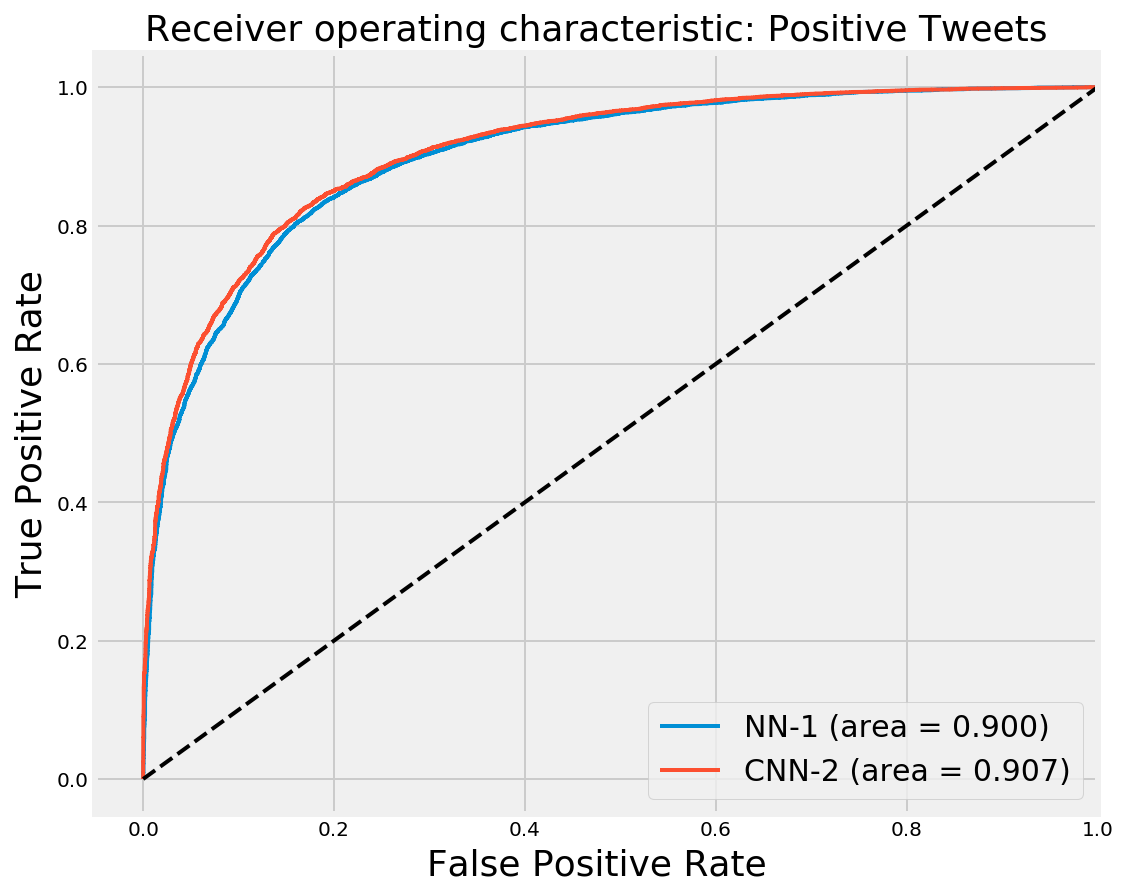

<Figure size 432x288 with 0 Axes>

In [0]:
fpr, tpr, threshold = roc_curve(y_test, yhat_nn1)
roc_auc = auc(fpr, tpr)
fpr_cnn, tpr_cnn, threshold = roc_curve(y_test, yhat_cnn2)
roc_auc_cnn = auc(fpr_cnn, tpr_cnn)
plt.figure(figsize=(8,7))
plt.plot(fpr, tpr, label='NN-1 (area = %0.3f)' % roc_auc, linewidth=2)
plt.plot(fpr_cnn, tpr_cnn, label='CNN-2 (area = %0.3f)' % roc_auc_cnn, linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic: Positive Tweets', fontsize=18)
plt.legend(loc="lower right", fontsize=15)
plt.show()
plt.savefig('auc-roc_NNvsCNN.png')